# EV Market Segmentation

##### Data Read-in and Import necessary libraries 

In [1]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

extraction_dir = r'C:\Users\dell\OneDrive\Desktop\Ev-Market-Segmentation\Datasets\Detailed India EV Market Data 2001 - 2024'


extracted_files = os.listdir(extraction_dir)
extracted_files

['EV Maker by Place.csv',
 'ev_cat_01-24.csv',
 'ev_sales_by_makers_and_cat_15-24.csv',
 'OperationalPC.csv',
 'Vehicle Class - All.csv']

#### Loading the CSV files into dataframes and Reading the data into pandas DataFrames 

In [2]:
file_paths = {
    'EV Maker by Place': os.path.join(extraction_dir, 'EV Maker by Place.csv'),
    'OperationalPC': os.path.join(extraction_dir, 'OperationalPC.csv'),
    'Vehicle Class - All': os.path.join(extraction_dir, 'Vehicle Class - All.csv'),
    'EV Category 01-24': os.path.join(extraction_dir, 'ev_cat_01-24.csv'),
    'EV Sales by Makers and Category 15-24': os.path.join(extraction_dir, 'ev_sales_by_makers_and_cat_15-24.csv')
}


dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

### Exploratory Data Analysis (EDA)

#### Visualisations - Top EV Makers, Operational PCs, Registration and Sales Trends 

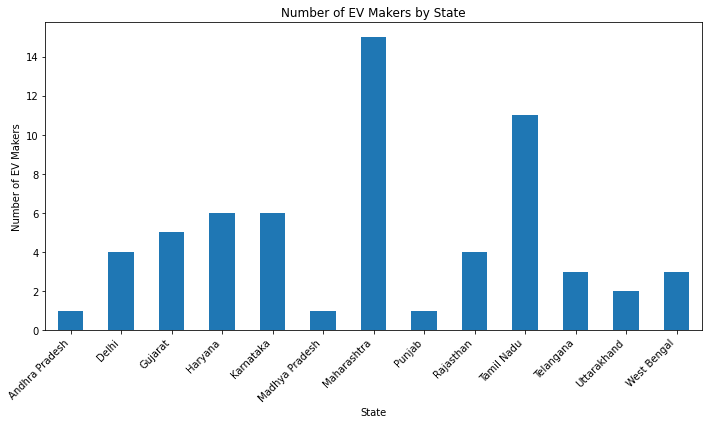

In [3]:
import matplotlib.pyplot as plt

def create_bar_plot(data, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    ascending=True

ev_maker_by_place = dataframes['EV Maker by Place'].groupby('State').size()
create_bar_plot(ev_maker_by_place, 'Number of EV Makers by State', 'State', 'Number of EV Makers')

#### Number of Operational Public Charging Stations by State

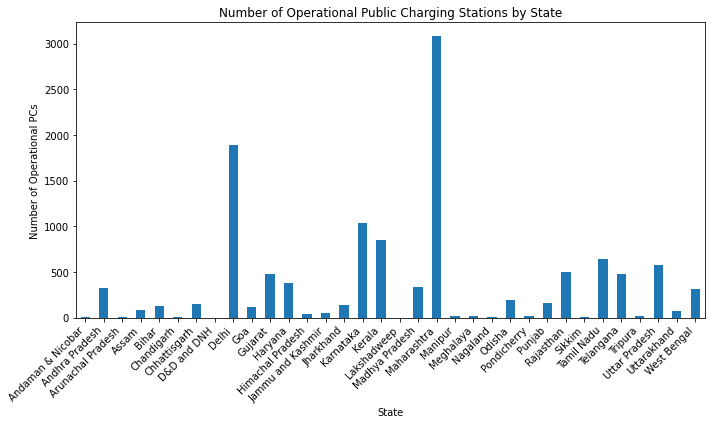

In [4]:
operational_pc = dataframes['OperationalPC'].set_index('State')
create_bar_plot(operational_pc['No. of Operational PCS'], 'Number of Operational Public Charging Stations by State', 'State', 'Number of Operational PCs')


#### EV Sales by Makers and Category 15-24

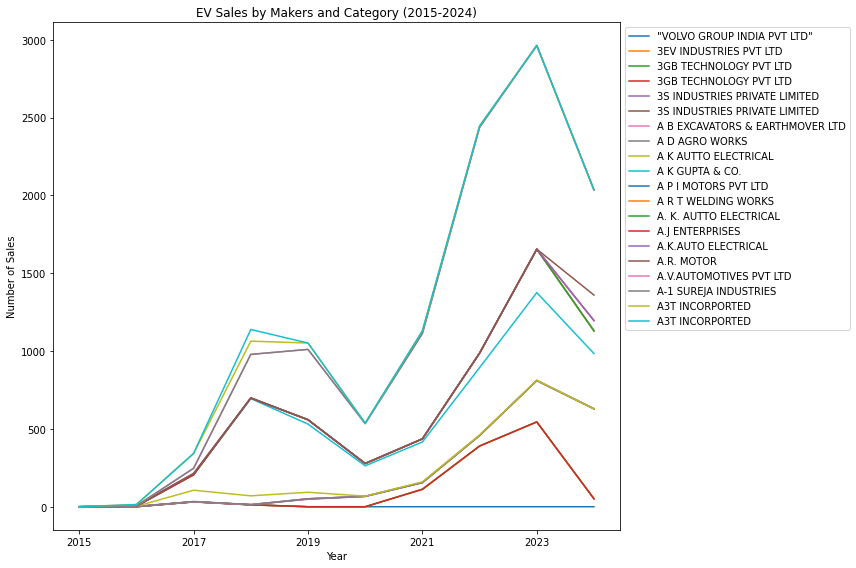

In [5]:
ev_sales = dataframes['EV Sales by Makers and Category 15-24'].set_index('Maker')[:20]
ev_sales.drop(columns=['Cat'], inplace=True)
ev_sales.T.plot(kind='line', stacked=True, figsize=(12, 8))
plt.title('EV Sales by Makers and Category (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

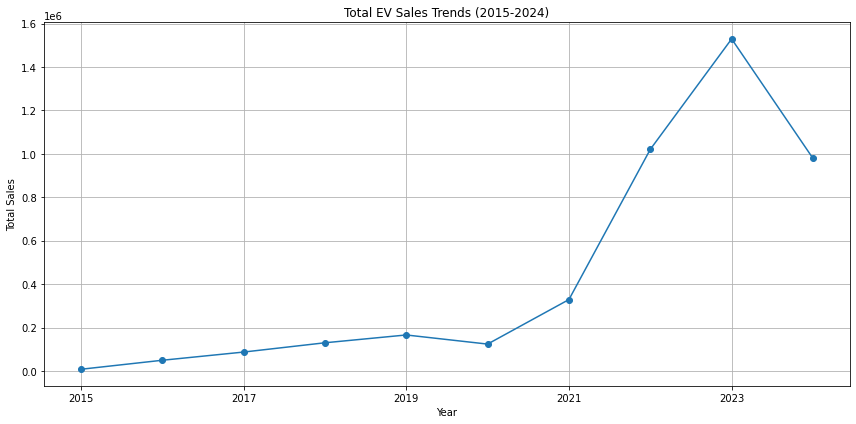

In [6]:
# EV Sales by Makers and Category (2015-2024) - Data Preparation
ev_sales = dataframes['EV Sales by Makers and Category 15-24'].set_index('Maker')
ev_sales.drop(columns=['Cat'], inplace=True)

# Calculate the total sales per year
total_sales_by_year = ev_sales.sum()

# Plot the total EV sales trends over the years
plt.figure(figsize=(12, 6))
total_sales_by_year.plot(marker='o')
plt.title('Total EV Sales Trends (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

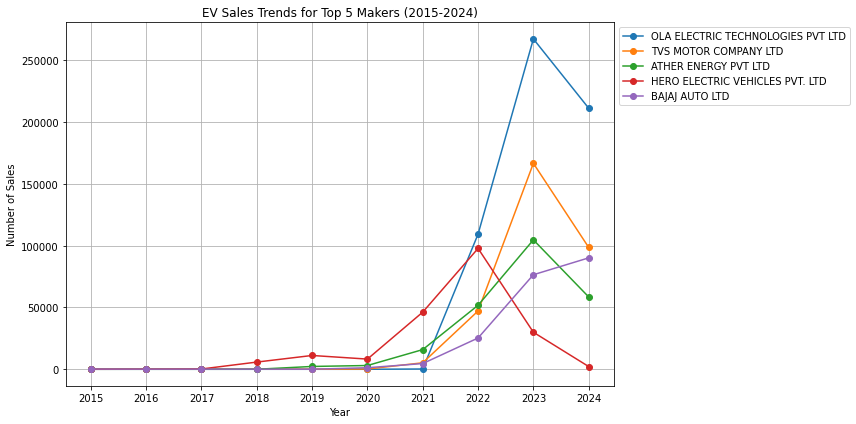

In [7]:
ev_sales_consolidated = ev_sales.groupby(ev_sales.index).sum()

top_ev_makers_consolidated = ev_sales_consolidated.sum(axis=1).sort_values(ascending=False).head(5).index
ev_sales_top_makers_consolidated = ev_sales_consolidated.loc[top_ev_makers_consolidated]

plt.figure(figsize=(12, 6))
for maker in ev_sales_top_makers_consolidated.index:
    plt.plot(ev_sales_top_makers_consolidated.columns, ev_sales_top_makers_consolidated.loc[maker], marker='o', label=maker)

plt.title('EV Sales Trends for Top 5 Makers (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

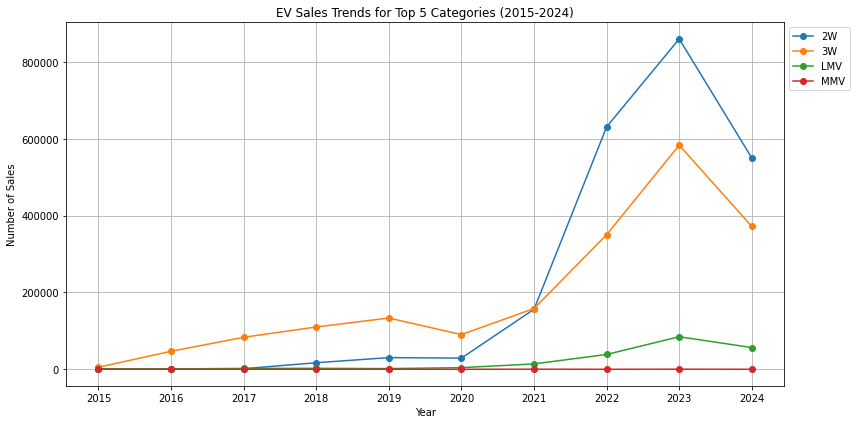

In [8]:
# Select the 'EV Sales by Makers and Category' dataset
ev_sales_cat = dataframes['EV Sales by Makers and Category 15-24']

ev_sales_by_category = ev_sales_cat.groupby('Cat').sum(numeric_only=True)

top_5_categories = ev_sales_by_category.sum(axis=1).sort_values(ascending=False).head(5).index

ev_sales_top_categories = ev_sales_by_category.loc[top_5_categories]

plt.figure(figsize=(12, 6))
for category in ev_sales_top_categories.index:
    plt.plot(ev_sales_top_categories.columns, ev_sales_top_categories.loc[category], marker='o', label=category)

plt.title('EV Sales Trends for Top 5 Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

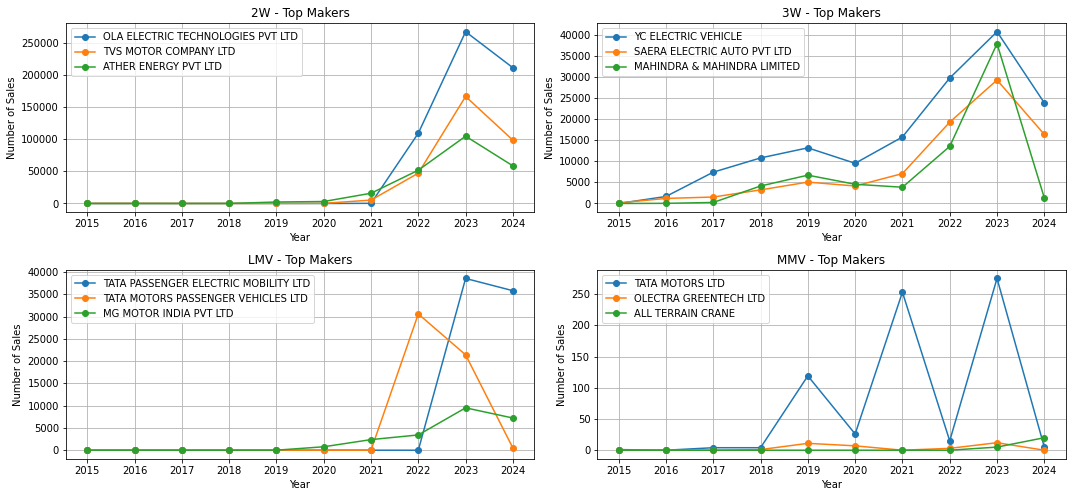

In [9]:
top_makers_per_category = {}

for category in top_5_categories:
    category_data = ev_sales_cat[ev_sales_cat['Cat'] == category]
    top_makers = category_data.groupby('Maker').sum(numeric_only=True).sum(axis=1).sort_values(ascending=False).head(3).index
    top_makers_per_category[category] = top_makers

plt.figure(figsize=(15, 10))

for i, (category, makers) in enumerate(top_makers_per_category.items(), 1):
    plt.subplot(3, 2, i)
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        plt.plot(maker_data.columns[2:], maker_data.iloc[0, 2:], marker='o', label=maker)
    plt.title(f'{category} - Top Makers')
    plt.xlabel('Year')
    plt.ylabel('Number of Sales')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

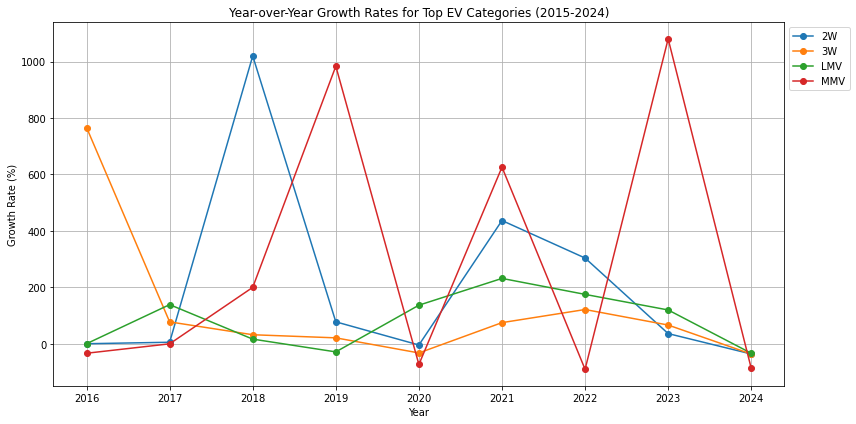

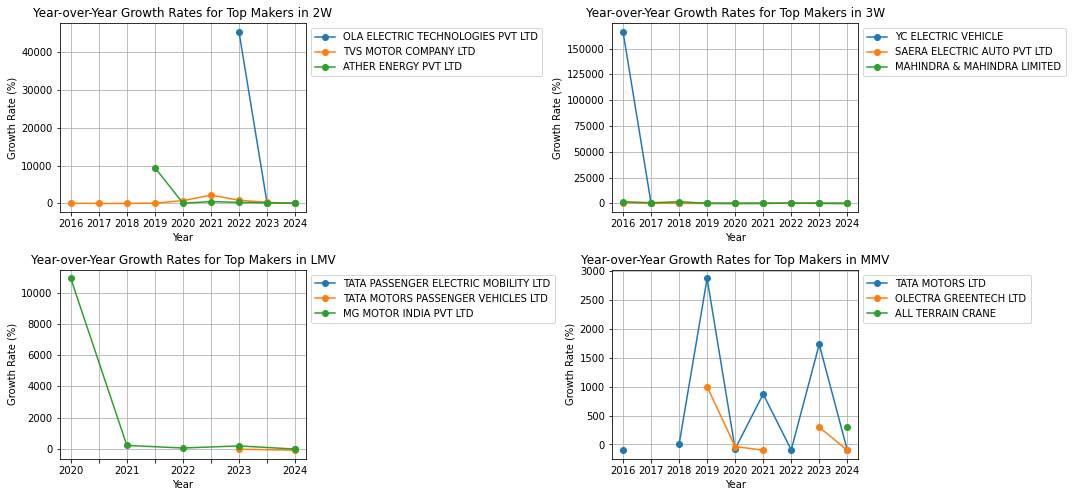

In [10]:
category_growth_rates = ev_sales_top_categories.pct_change(axis=1) * 100

plt.figure(figsize=(12, 6))
for category in category_growth_rates.index:
    plt.plot(category_growth_rates.columns, category_growth_rates.loc[category], marker='o', label=category)

plt.title('Year-over-Year Growth Rates for Top EV Categories (2015-2024)')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

maker_growth_rates = {}
for category, makers in top_makers_per_category.items():
    growth_rates = []
    for maker in makers:
        maker_data = ev_sales_cat[(ev_sales_cat['Cat'] == category) & (ev_sales_cat['Maker'] == maker)]
        growth_rate = maker_data.iloc[0, 2:].pct_change() * 100
        growth_rates.append(growth_rate)
    maker_growth_rates[category] = pd.concat(growth_rates, axis=1)
    maker_growth_rates[category].columns = makers

plt.figure(figsize=(15, 10))

for i, (category, growth_rates) in enumerate(maker_growth_rates.items(), 1):
    plt.subplot(3, 2, i)
    growth_rates.plot(ax=plt.gca(), marker='o')
    plt.title(f'Year-over-Year Growth Rates for Top Makers in {category}')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)

plt.tight_layout()
plt.show()

# Sales Forecast

### Forecasting the overall EV sales for next 5 years 

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


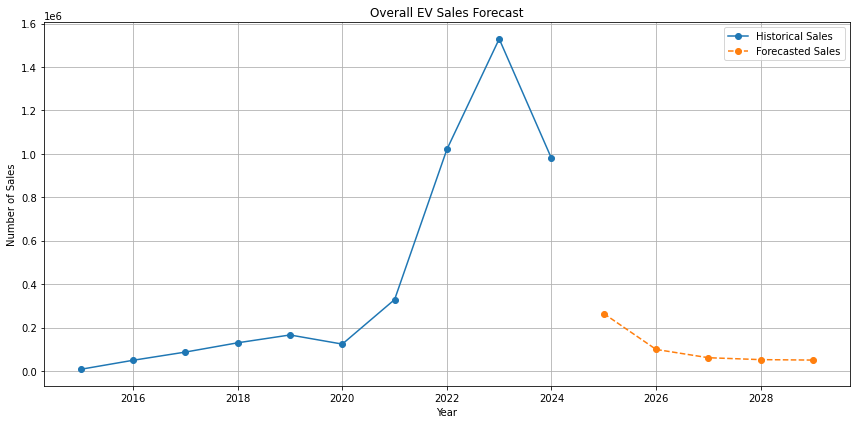

In [11]:
from statsmodels.tsa.arima.model import ARIMA

overall_sales = ev_sales_by_category.sum()

overall_sales.index = overall_sales.index.astype(int)

model = ARIMA(overall_sales, order=(1, 1, 1))
model_fit = model.fit()

forecast_steps = 5
forecast = model_fit.forecast(steps=forecast_steps)

future_years = np.arange(overall_sales.index[-1] + 1, overall_sales.index[-1] + 1 + forecast_steps)

plt.figure(figsize=(12, 6))
plt.plot(overall_sales.index, overall_sales, marker='o', label='Historical Sales')
plt.plot(future_years, forecast, marker='o', linestyle='--', label='Forecasted Sales')
plt.title('Overall EV Sales Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()